<a href="https://colab.research.google.com/github/ClovisMonteiro/Redes_neurais/blob/master/PyTorch_M%C3%B3dulo_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch

Além da computação tensorial eficiente, o PyTorch também oferece o módulo nn para a construção de redes neurais(neural networks).


Documentação: https://pytorch.org/docs/stable/nn.html#torch.nn.Linear


Ele é importado dentro do pacote torch.

In [0]:
from torch import nn

Através desse módulo podemos instanciar uma ampla diversidade de camadas neurais com chamadas de alto nível.

Para instanciar uma camada referente ao perceptron clássico, utilizamos a camada Linear. Ela recebe dois parametros:


1.   **in_features**: que é a dimensionalidade da entrada
2.   **out_features**: dimensionalidade da saída

Na representação clássica do perceptron temos uma entrada com 3 dimensões:

*  X = {x1, x2, x3}

Em uma única saída (um numero), produto da transformação linear:
*   y = WX + b

Em termos de camada Linear:
*   in_features: 3
*   out_features: 1






# Camada Linear

Importando o módulo nn e o torch

In [0]:
import torch 
from torch import nn # neural networks

Instanciando a camada linear -> perceptron

In [0]:
torch.manual_seed(42)

perceptron = nn.Linear(in_features=3,  out_features= 1)
print(perceptron)


Linear(in_features=3, out_features=1, bias=True)


Ver os parâmetros que tem no perceptron: Função: named_parameters

In [0]:
for nome, tensor in perceptron.named_parameters():
  print(nome, tensor.data)

print('')
print(perceptron.weight.data)
print(perceptron.bias.data)

weight tensor([[ 0.4414,  0.4792, -0.1353]])
bias tensor([0.5304])

tensor([[ 0.4414,  0.4792, -0.1353]])
tensor([0.5304])


In [0]:
w1, w2, w3 = perceptron.weight.data.numpy()[0]
b = perceptron.bias.data.numpy

#w1 * x1 + w2 * x2 + w3 * x3 + b = 0

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d (perceptron):
  w1, w2, w3 = perceptron.weight.data.numpy()[0]
  b = perceptron.bias.data.numpy()

  X1 = np.linspace(-1,1,10)
  X2 = np.linspace(-1,1,10)

  X1,X2 = np.meshgrid(X1,X2)
  X3 = (b - w1*X1 - w2*X2) / w3


  fig =plt.figure(figsize = (10,8))
  ax = fig.gca(projection='3d')
  ax.view_init(azim=180)
  
  ax.plot_surface(X1, X2, X3, cmap = 'plasma')

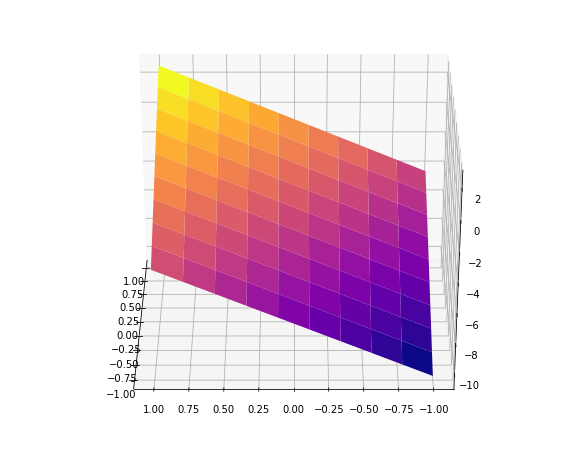

In [0]:
plot3d(perceptron)

# Foward 

O fluxo de informações de entrada através da rede recebe o nome de foward, já que a informação é passada para a frente. Tem que realizar o foward da nossa rede de um perceptron só. Para isso, bata realizar uma chamada de função com a variável onde instaciamos a camada linear.

tensor([-0.2194], grad_fn=<AddBackward0>)


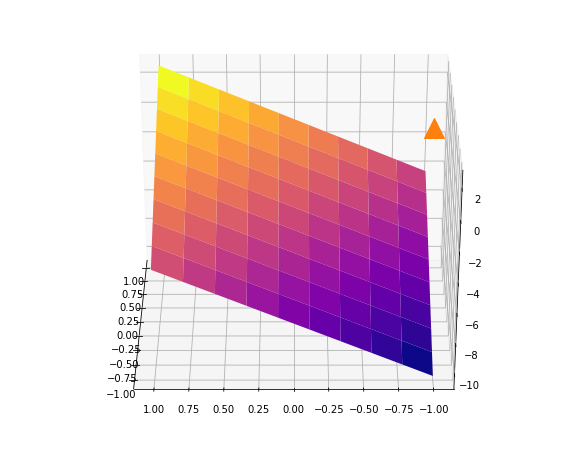

In [0]:
X = torch.Tensor([0,-1,2])
y = perceptron(X)

print(y)

plot3d(perceptron)
plt.plot([X[0]],[X[1]],[X[2]], marker = '^', markersize=20)

# Função de ativação

O perceptron é a unidade fundametal de redes neurais, ele recebe d conexões de entrada e produz um unico valor de saída.

Seu processamento é composto por:
*  Função de mapeamento equivalente à regra geral de modelos lineares.

* **Função de ativação *f*** 

De forma abstrata, um neurônio interpreta as suas entradas e libera uma ativação com determinada força.
*  Em termos práticos, um neurônio deve ativar quando suas entradas apresentarem o padrão para qual ele foi treinado.
* O papel da função de ativação é definir se o neurônio vai ativar e qual a sua força de ativação.

 Quando construir o primeiro modelo linear (a reta), a função classify() solucionava a equação da reta para um dado ponto e tomava uma decisão:
 * if ret > = 0 : return 1

 * else: return 0

Essa decisão é uma função limiar. Uma transformação não linear que limita a saída do perceptron a 0 ou a 1.
 * 0: inativo
 * 1: ativo

A função limiar está limitada a esses dois estados {0, 1}, como um interruptor.

Para que o neurônio possa ativar com diferentes "Forças", existem funções como a **SIGMÓIDE**. Ela também define um intervalo [0,1], mas pode assumir qualquer valor dentro desse intervalo.

Funções de ativações mais "populares":
*   Limiar
*   Sigmóide (Sigmoid) 
*   Tangente Hiperbólica (tanh, perminte valores negativos)
*   ReLU   


# Problema com múltiplas categorias

Para problemas de classificação com múltiplas categorias, a função softmax é aplicada à saída da camada output. Ela transforma os scores individuais dos perceptrons em uma distribuição de probabilidades.

Exemplo:

In [2]:
from torch import nn
import torch

softmax = nn.Softmax()

output = torch.Tensor([2,-1,0.5])
output_ativado = softmax(output)
print(output_ativado)


tensor([0.7856, 0.0391, 0.1753])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  import sys


No Pytorch, para instanciar uma rede neural com múltiplos neurônios na mesma camada, basta alterar o parâmetro **out_features**. Relembrando:
 - **in_features:** dimensionalidade de entrada
 - **out_features:** dimensionalidade de saída (quantidade de neurônios)

ou seja, no caso de um problema com dois neurônios de entrada e três neurônios de saida podemos instanciar:


In [0]:
linear = nn.Linear(in_features=2, out_features=3)

# Múltiplas camadas de Perceptron (Multi-Layer Perceptron - MLP)


- Algoritmo backpropagation (propagação do erro para os neurônios)
- Não linearidade em camadas intermediárias (Escondidas, Hidden)

Para o problema XOR é interessante utilizar a seguinte arquitetura: 
- Camada escondida com 6 neurônios:
  - ativação ReLU
- Camada de saída com 1 neurônio
  - ativação sigmóide

Camada totalmemte conectadas
  - Fully Connected(Fc)
  - Dense
  - Linear

Resolucionando o problema XOR, temos:

In [5]:
nn.Linear(in_features=2, out_features=6)
nn.ReLU()
nn.Linear(in_features=6, out_features=1)
nn.Sigmoid()

Sigmoid()

- Descobriu-se uma arquitetura hierárquica (em camadas) que consegue aproximar funções mais complexas 
- As características aprendidas nas camadas intermediárias são linearmente separáveis.
- O Potencial do aprendizado hiérárquico de características deu origem ao que conhecemos hoje como** Deep Learning**(Aprendizado de Características + Inferência -  (mais estudos em breve))

